# COVID-19 Numbers of Cases by Country

Data source: https://github.com/CSSEGISandData/COVID-19 by Johns Hopkins University

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
from utilities import *
print(pd.__version__)

0.23.4


## Cumulated confirmed cases in the most infected countries

In [3]:
data_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
data_confirmed_c = merge_locals(data_confirmed)

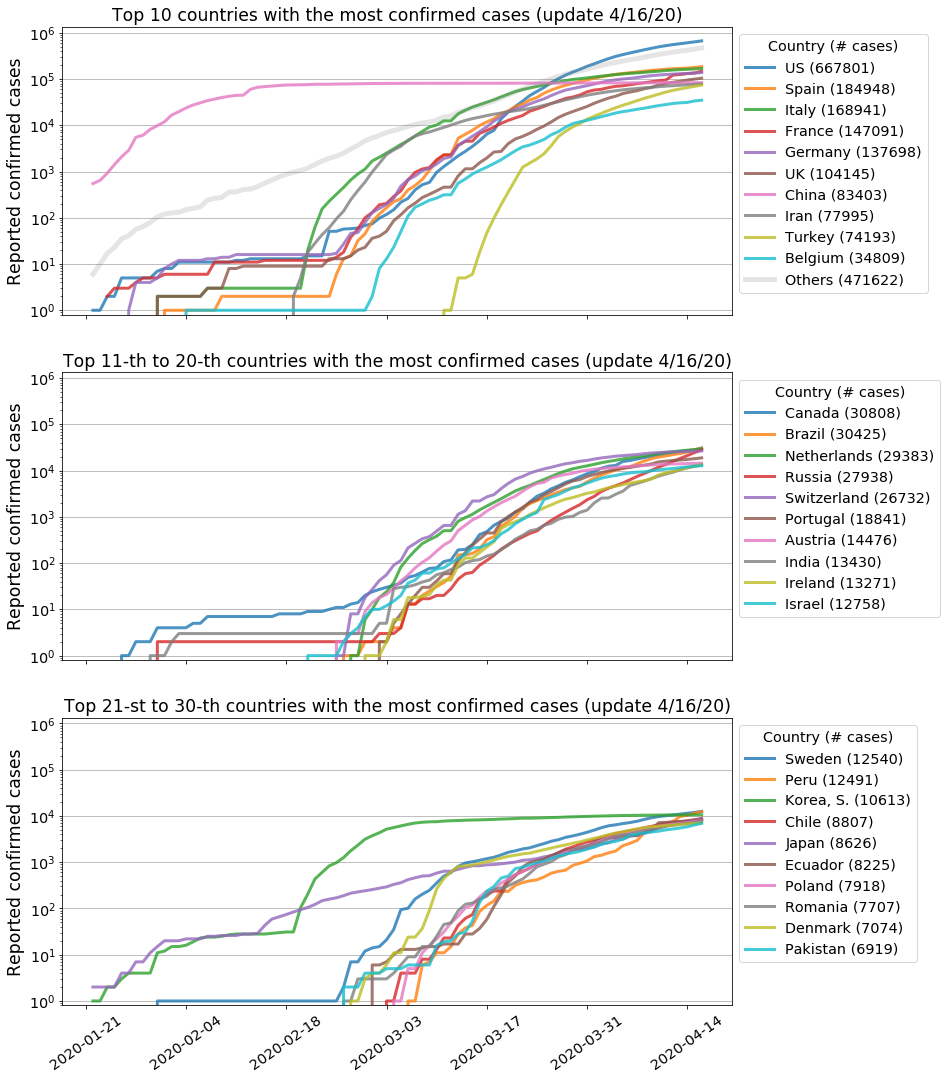

In [4]:
fig1, axes = plt.subplots(3, 1, figsize=(15,18), sharex=True, sharey=True)
plot_cumulated_histories(axes[0], data_confirmed_c, 0, 10, 'Top 10 countries with the most confirmed cases', plot_remaining=True)
plot_cumulated_histories(axes[1], data_confirmed_c, 10, 20, 'Top 11-th to 20-th countries with the most confirmed cases');
plot_cumulated_histories(axes[2], data_confirmed_c, 20, 30, 'Top 21-st to 30-th countries with the most confirmed cases');

## Number of cases vs. days since the 100-th case

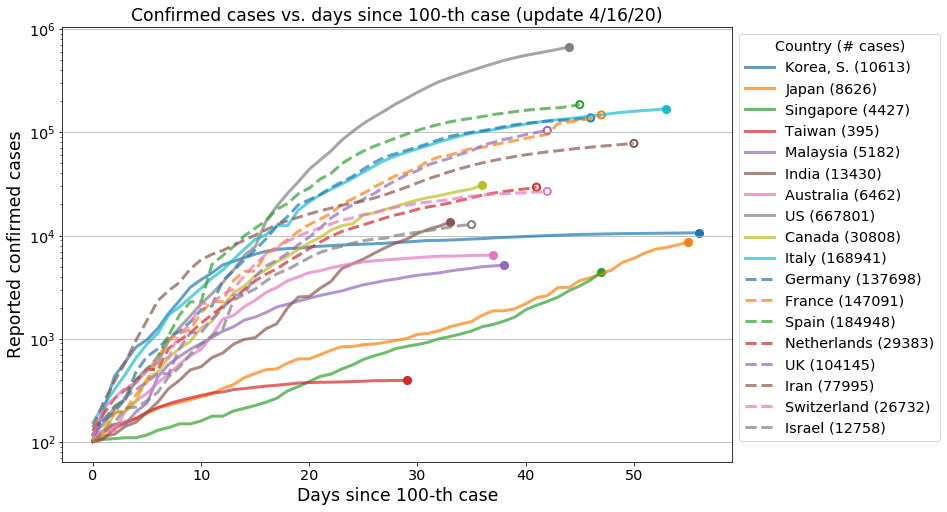

In [5]:
fig4, ax = plt.subplots(1, 1, figsize=(15,8))
plot_cumulated_since(ax, data_confirmed_c, ['Korea, South', 'Japan', 'Singapore', 'Taiwan', 'Malaysia', 'India', 'Australia', 'US', 'Canada', 'Italy', 'Germany', 'France', 'Spain', 'Netherlands', 'United Kingdom', 'Iran', 'Switzerland', 'Israel'], threshold=100)

## New cases vs. existing cases

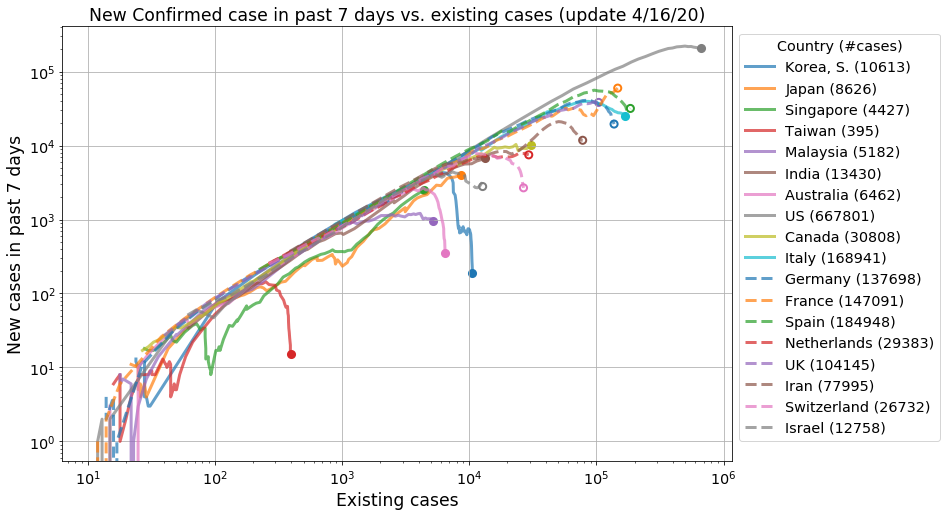

In [6]:
fig5, ax = plt.subplots(1, 1, figsize=(15,8))
plot_new_vs_existing(ax, data_confirmed_c, 7, ['Korea, South', 'Japan', 'Singapore', 'Taiwan', 'Malaysia', 'India', 'Australia', 'US', 'Canada', 'Italy', 'Germany', 'France', 'Spain', 'Netherlands', 'United Kingdom', 'Iran', 'Switzerland', 'Israel'], threshold=10)

## Cumulated deaths in the countries with heighest number of deaths

In [7]:
data_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
data_deaths_c = merge_locals(data_deaths)

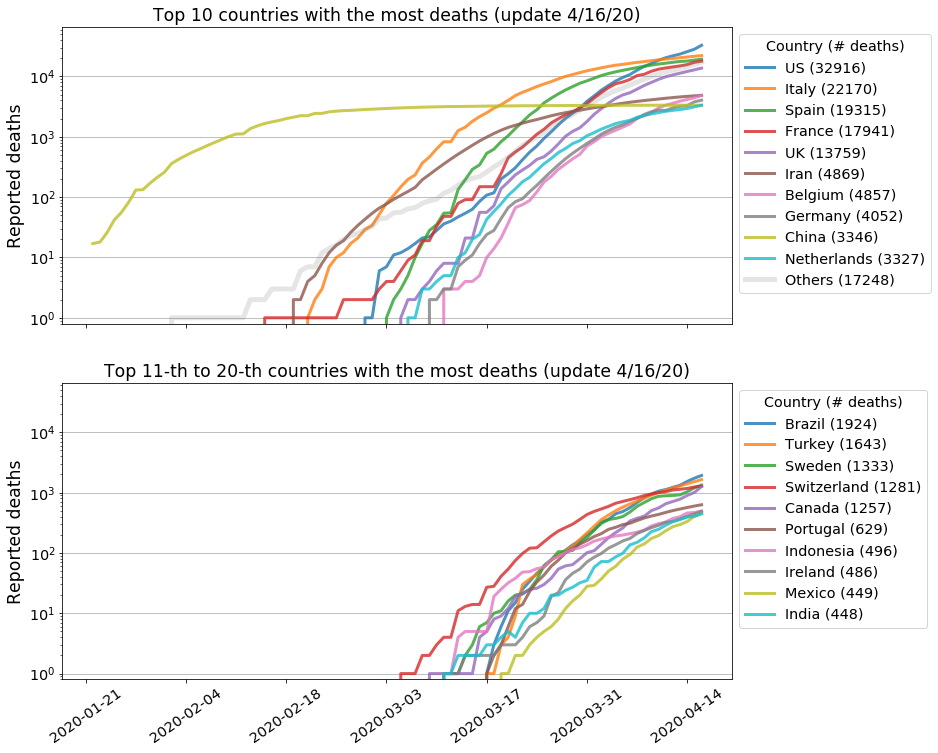

In [8]:
fig2, axes = plt.subplots(2, 1, figsize=(15,12), sharex=True, sharey=True)
plot_cumulated_histories(axes[0], data_deaths_c, 0, 10,'Top 10 countries with the most deaths', case='deaths', plot_remaining=True);
plot_cumulated_histories(axes[1], data_deaths_c, 10, 20, 'Top 11-th to 20-th countries with the most deaths', case='deaths', plot_remaining=False);

## Case fatality ratio (deaths / confirmed)

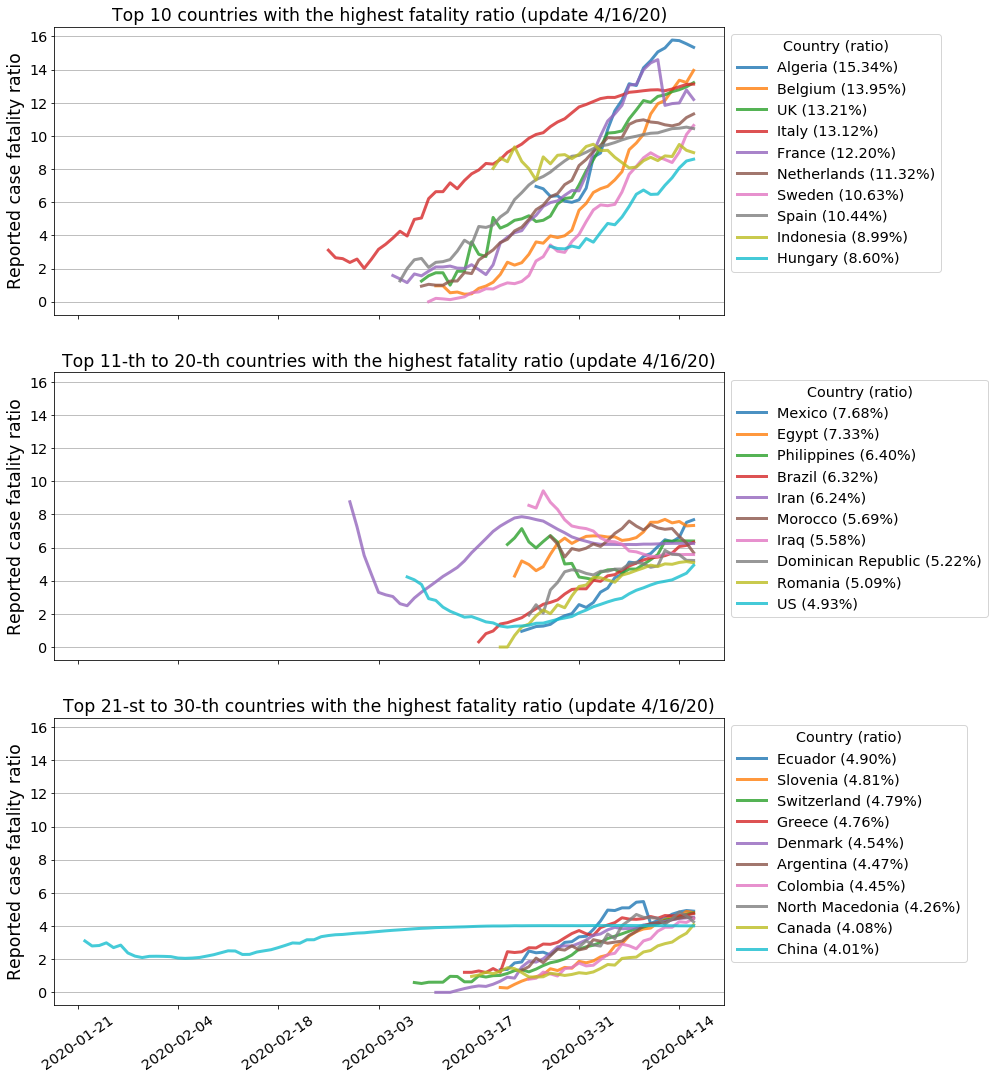

In [9]:
fig3, axes = plt.subplots(3, 1, figsize=(15,18), sharex=True, sharey=True)
plot_fatality_ratio(axes[0], data_deaths_c, data_confirmed_c, 0, 10, min_cases=1000, threshold=300, title='Top 10 countries with the highest fatality ratio')
plot_fatality_ratio(axes[1], data_deaths_c, data_confirmed_c, 10, 20, min_cases=1000, threshold=300, title='Top 11-th to 20-th countries with the highest fatality ratio')
plot_fatality_ratio(axes[2], data_deaths_c, data_confirmed_c, 20, 30, min_cases=1000, threshold=300, title='Top 21-st to 30-th countries with the highest fatality ratio')

## Daily increase rate of confirmed cases

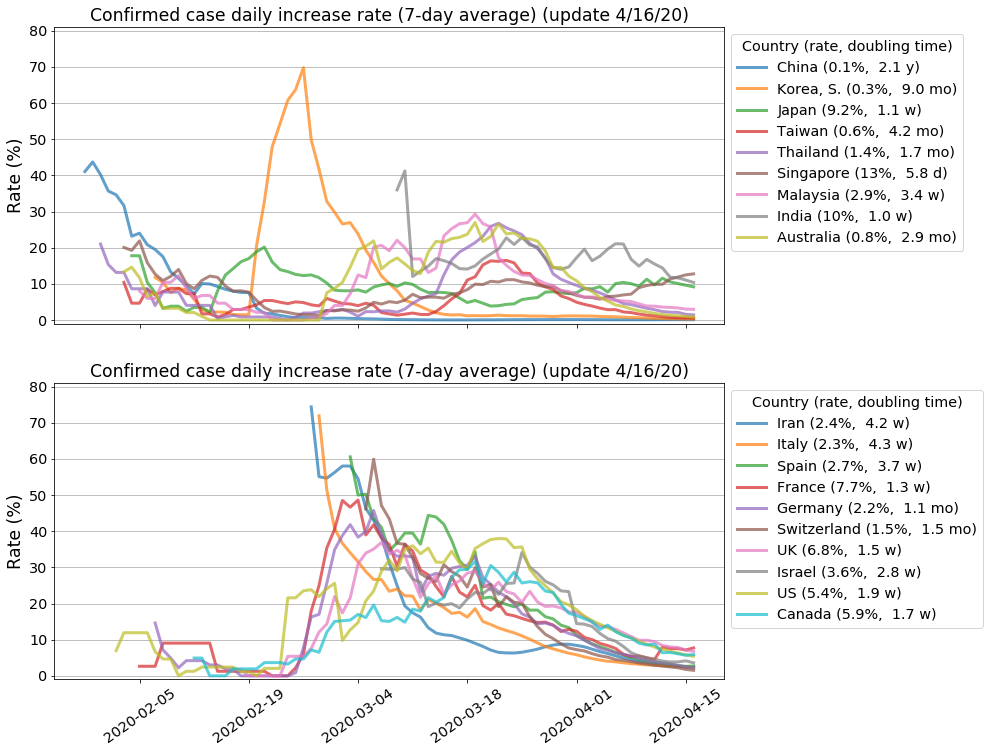

In [10]:
fig3, axes = plt.subplots(2, 1, figsize=(15,12), sharex=True, sharey=True)
plot_average_rate(axes[0], data_confirmed_c, 7, ['China', 'Korea, South', 'Japan', 'Taiwan', 'Thailand', 'Singapore', 'Malaysia', 'India', 'Australia'], threshold=5, ymax=81)
plot_average_rate(axes[1], data_confirmed_c, 7, ['Iran', 'Italy', 'Spain', 'France', 'Germany', 'Switzerland', 'United Kingdom', 'Israel', 'US', 'Canada'], threshold=5, ymax=81)

## Daily increase rate of deaths

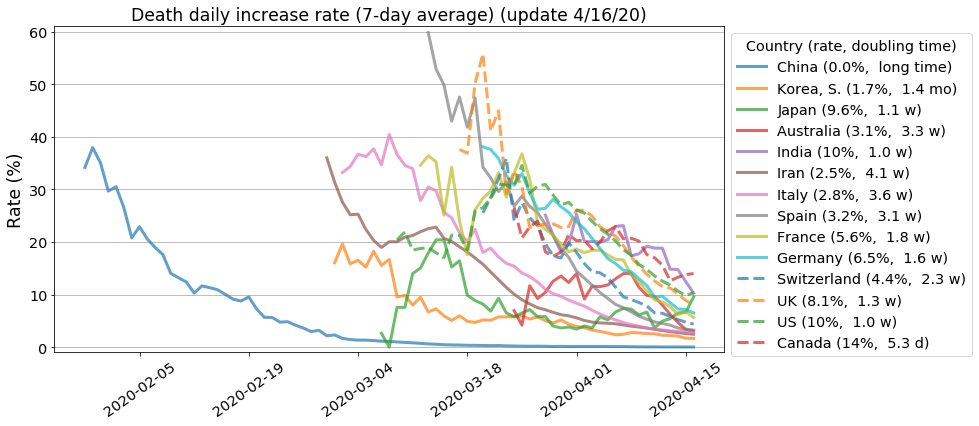

In [11]:
fig3, axes = plt.subplots(1, 1, figsize=(15,6), sharex=True, sharey=True)
plot_average_rate(axes, data_deaths_c, 7, ['China', 'Korea, South', 'Japan', 'Australia', 'India','Iran', 'Italy', 'Spain', 'France', 'Germany', 'Switzerland', 'United Kingdom', 'US', 'Canada'], threshold=5, title_head='Death', ymax=61)

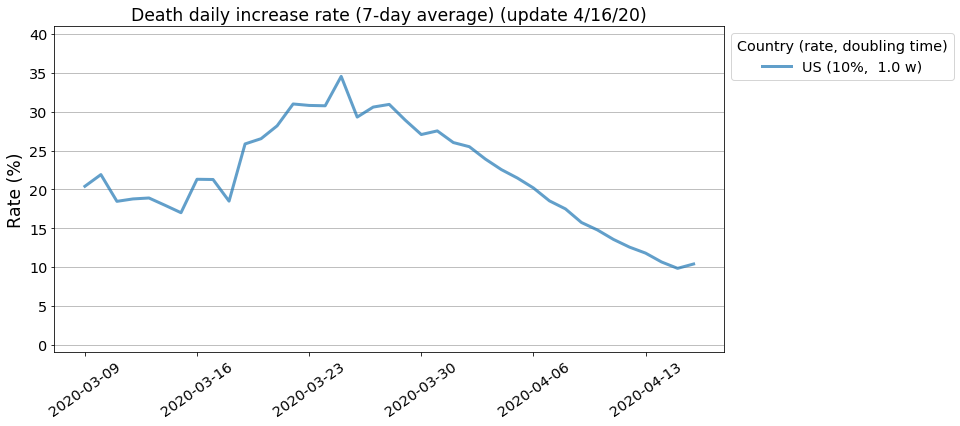

In [12]:
fig3, axes = plt.subplots(1, 1, figsize=(15,6), sharex=True, sharey=True)
plot_average_rate(axes, data_deaths_c, 7, ['US'], threshold=5, title_head='Death', ymax=41)

In [13]:
dfd = data_deaths_c.loc['US']['2/20/20':]

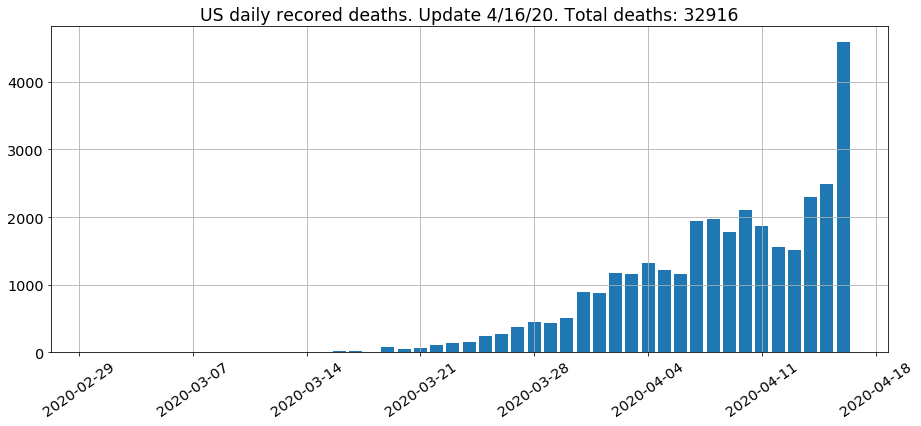

In [14]:
df = dfd.diff(1)['3/1/20':]
plt.figure(figsize=(15,6))
ax = plt.subplot(111)
ax.bar(pd.to_datetime(df.index), df)
#ax.plot_date(df.index, df);
ax.set_title('US daily recored deaths. Update {}. Total deaths: {}'.format(df.index[-1], int(data_deaths_c.loc['US'][df.index[-1]])), fontsize='xx-large')
plt.setp(ax.get_yticklabels(), fontsize='x-large')
plt.setp(ax.get_xticklabels(), fontsize='x-large', rotation=35);
ax.grid();